In [ ]:
import sys

sys.path.append("..")

import os
from datasets import load_dataset
from segment.visualizer import display_image_with_masks_and_boxes
from segment.utils import resize_image_pil, convert_coco_polygons_to_mask
from create_dataset import filter_list_in_column
from PIL import Image


# The number of workers for the dataloader
num_workers = os.cpu_count()

# The directory for hugging face cache
cache_dir = "hf_cache"

# The image dataset ID and split to load
dataset_id ="MnLgt/fashion_people_detections_v2"

split = "train"

In [ ]:
ds = load_dataset(
    dataset_id,
    split=split,
    trust_remote_code=True,
    cache_dir=cache_dir,
    streaming=True,
)

In [ ]:
rows = iter(ds)
row = next(rows)

In [27]:
def poly_to_mask(row, height=1024, width=1024):
    poly = row['polygons']
    mask = convert_coco_polygons_to_mask(poly, height, width)
    row['mask'] = Image.fromarray(mask)
    return row

def add_mask_to_md(md):
    return [poly_to_mask(row) for row in md]

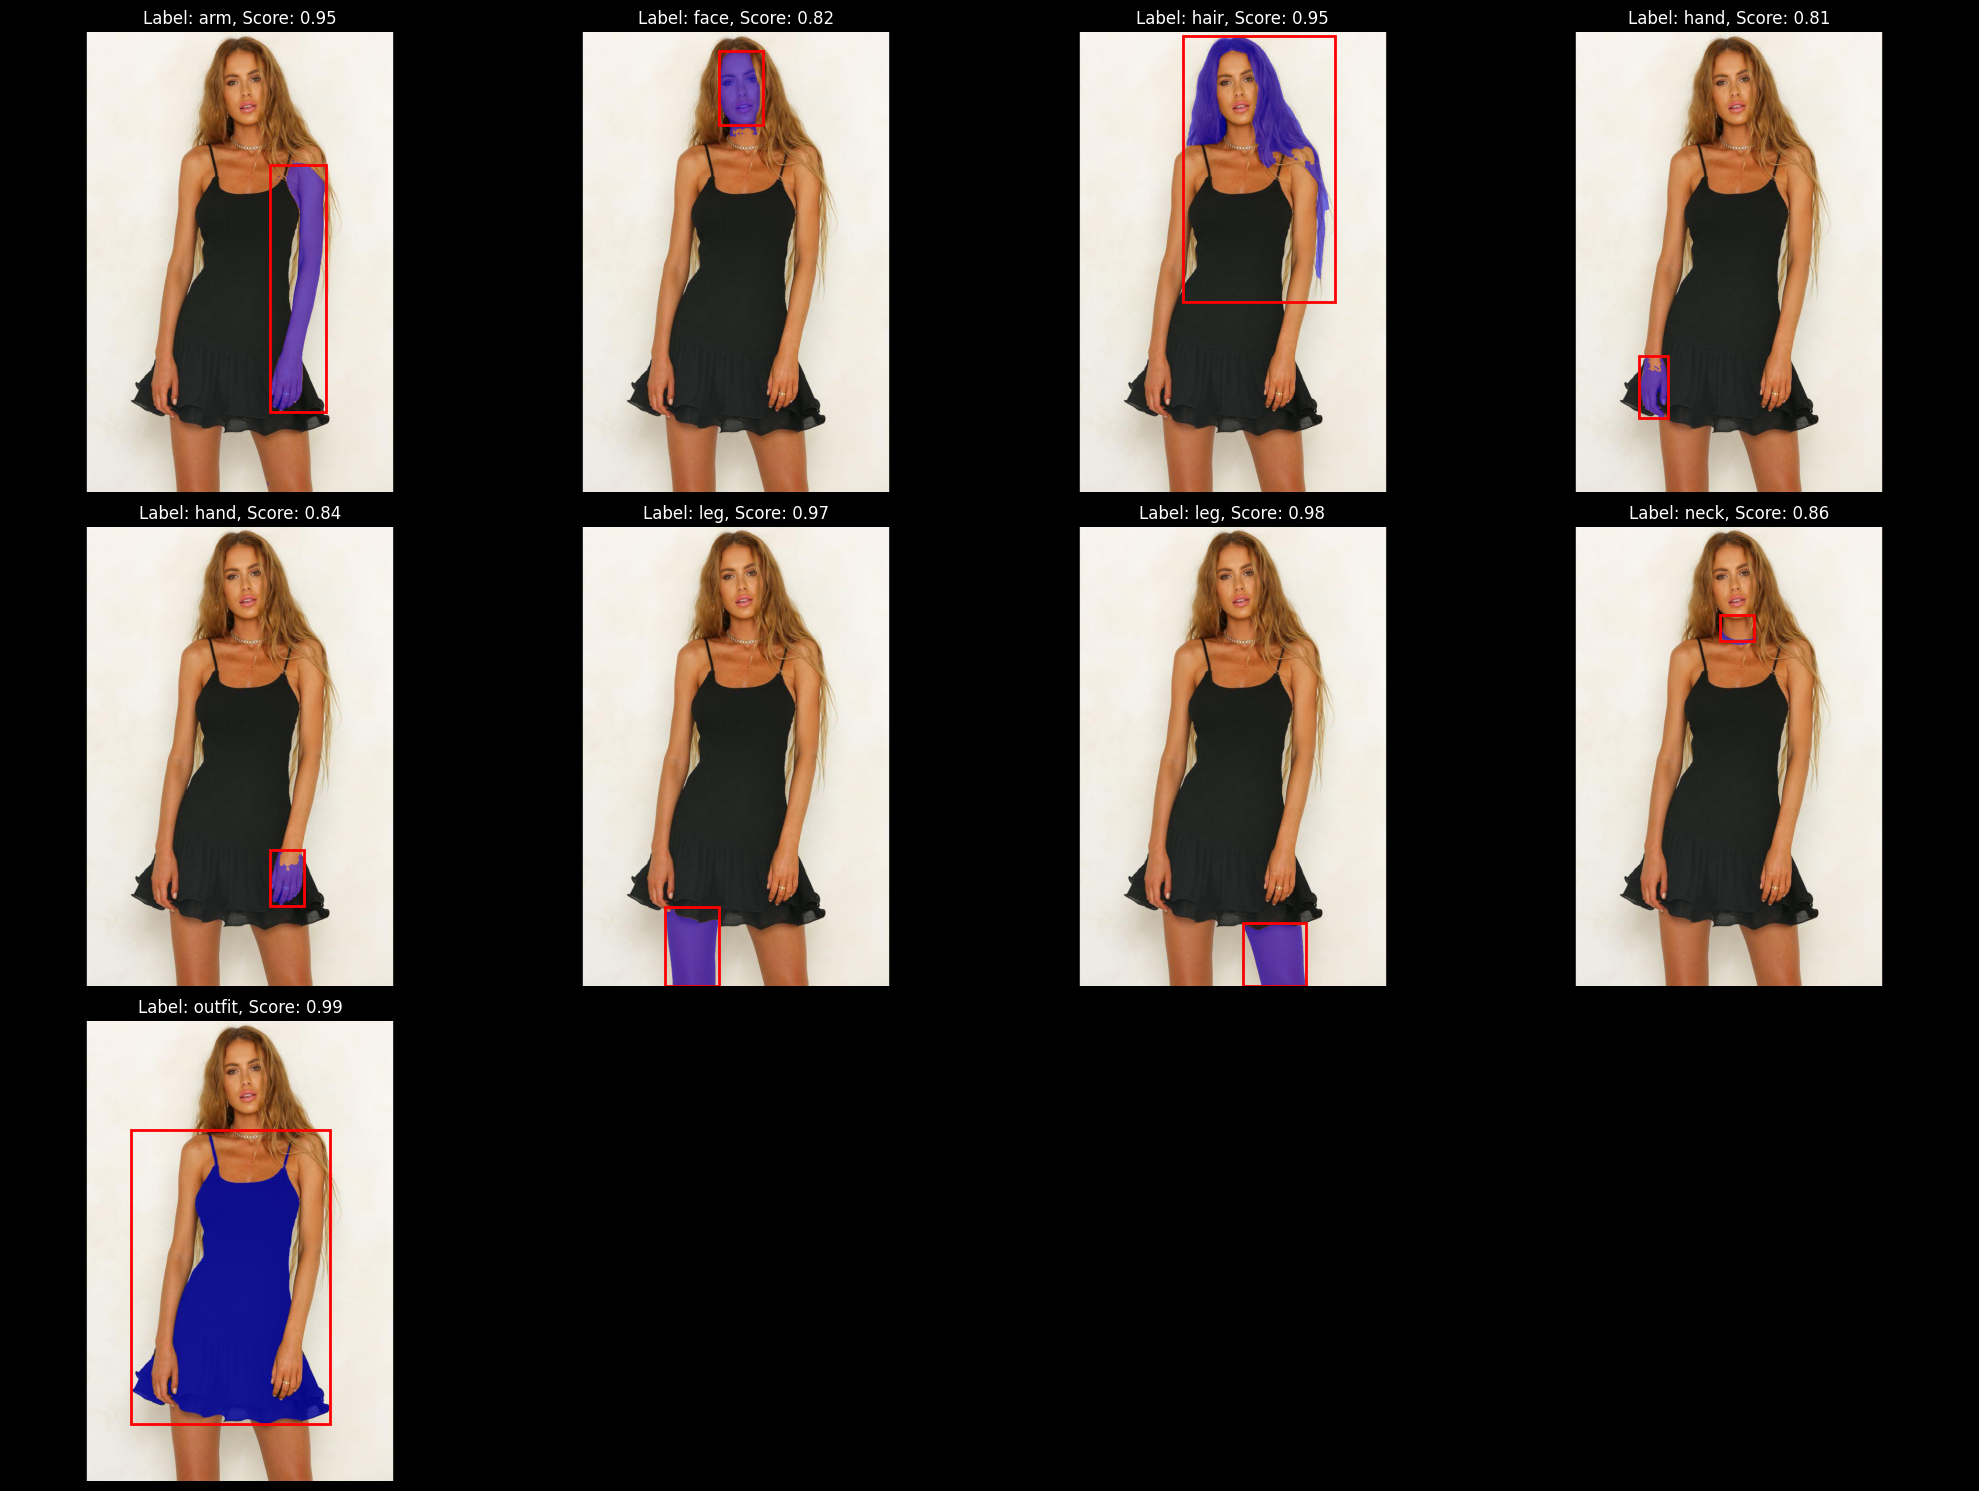

In [42]:


row = next(rows)
image = resize_image_pil(row['image'])
md = row['metadata']
md = add_mask_to_md(md)
display_image_with_masks_and_boxes(image, md,prompt_label='label')